In [2]:
# 实现池化层的正向传播
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size  # 取池化窗口的高宽
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w +1)) # 输入高-窗口高+1，宽一样
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i ,j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [3]:
# 1.最大汇聚层和平均汇聚层
# 验证二维最大池化层的输出
X = torch.tensor([[0.0, 1.0, 2.0],[3.0, 4.0 , 5.0],[6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [4]:
# 验证平均池化层
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [5]:
# 2.填充和步幅
# 填充和步幅
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [6]:
# 深度学习框架中的步幅与池化窗口的大小相同
# 默认情况下，深度学习框架中的步幅与汇聚窗口的大小相同。 因此，如果我们使用形状为(3, 3)的汇聚窗口，那么默认情况下，我们得到的步幅形状为(3, 3)
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [7]:
# 填充和步幅可以手动设定
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [8]:
# 当然，我们可以设定一个任意大小的矩形汇聚窗口，并分别设定填充和步幅的高度和宽度。
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [9]:
# 3.多个通道
X = torch.cat((X, X+1),1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

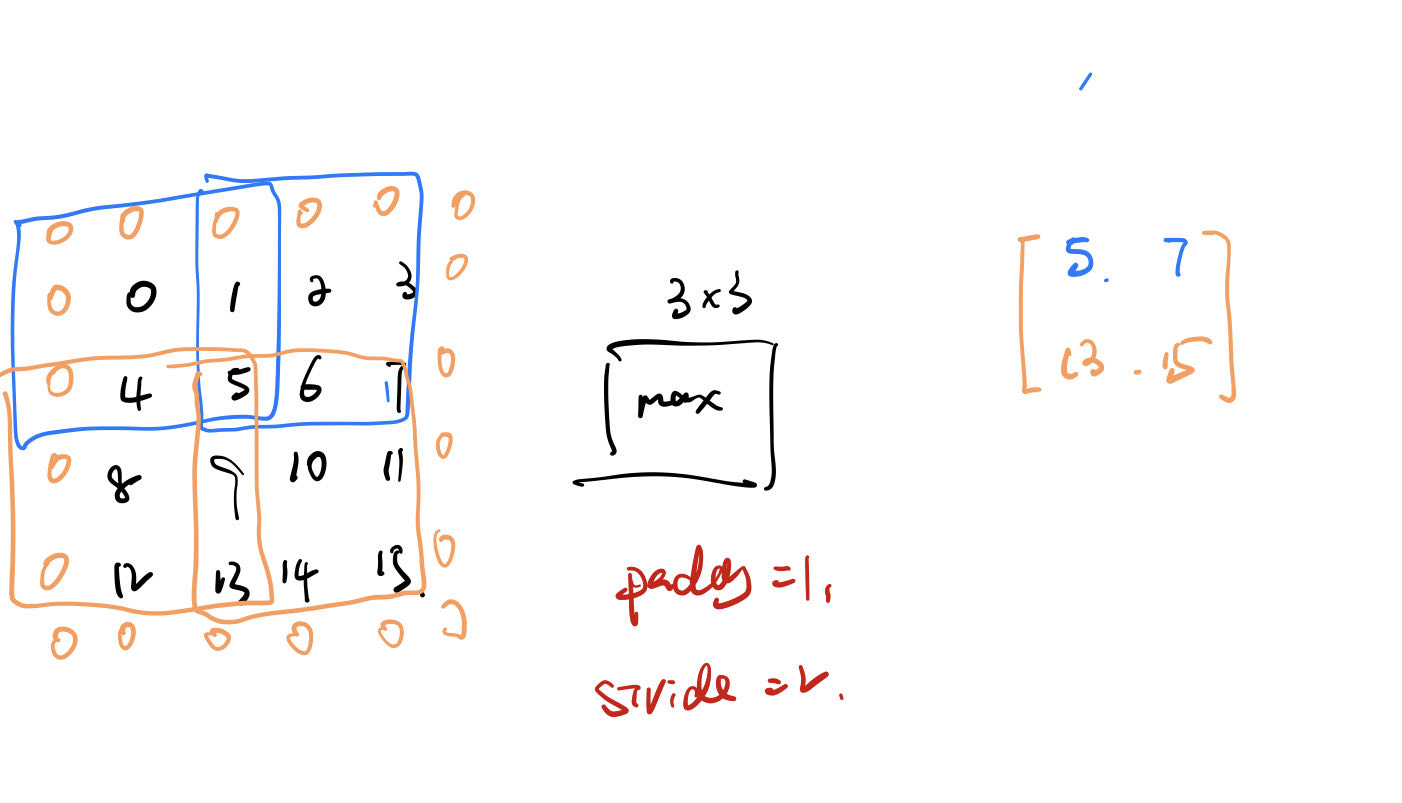

In [11]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])